In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\plots\\'

In [3]:
# read in GSEA of PC2 loadings "downregulated & strong influence"
excelpath = "W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\PC2_summary.xlsx"

TF_targets = pd.read_excel(excelpath, sheet_name=0)
TF_targets = TF_targets.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'}).sort_values(by='NES')

KEGG_pathway = pd.read_excel(excelpath, sheet_name=1)
KEGG_pathway = KEGG_pathway.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'}).sort_values(by='NES')

GO_process = pd.read_excel(excelpath, sheet_name=2)
GO_process = GO_process.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'}).sort_values(by='NES')


In [4]:
# playing with filters
TF_targets = TF_targets[TF_targets.SIZE > 75] # take top 2, 4, or 5
KEGG_pathway = KEGG_pathway[KEGG_pathway.SIZE > 75] # take top 2, or 4
GO_process = GO_process[GO_process.SIZE > 75] # take top 3, or 4

###### prepare the plot
TF_targets['logFDR'] = -1 * np.log10(TF_targets.q_value)
KEGG_pathway['logFDR'] = -1 * np.log10(KEGG_pathway.q_value)
GO_process['logFDR'] = -1 * np.log10(GO_process.q_value)


C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [5]:
# stitch together the individual dataframes
spacer_df = pd.DataFrame(0,index = ['SPACE1','SPACE2','SPACE3','SPACE4'], columns = KEGG_pathway.columns)
plot_df = GO_process[:2].append(spacer_df[:1])
plot_df = plot_df.append(KEGG_pathway[:2])
plot_df = plot_df.append(spacer_df[:1])
plot_df = plot_df.append(TF_targets[:2])
# assume FDR q-value was < 1e-5 where GSEA reported 0.0
plot_df = plot_df.replace(np.inf,5)


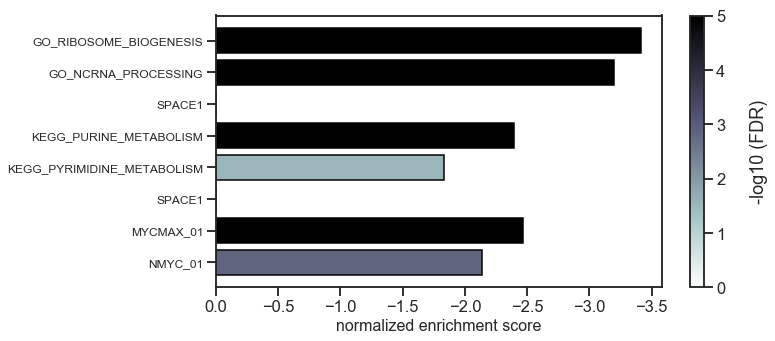

In [7]:
# set colormap maximum to up-rounded logFDR
norm = mpl.colors.Normalize(vmin = 0., vmax = math.ceil(max(plot_df['logFDR'])))
plot_df['color'] = list(plt.cm.bone_r(norm(list(plot_df['logFDR']))))

##### finally plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(10,5))

f = plt.barh(range(len(plot_df)), plot_df['NES'], color = plot_df['color'], edgecolor = ['k' for i in plot_df.index])

plt.yticks(range(len(plot_df)), list(plot_df.index), fontsize = 12)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel('normalized enrichment score', fontsize = 16)

sm = mpl.cm.ScalarMappable(cmap=plt.cm.get_cmap('bone_r'), norm=norm)
sm.set_array([])
plt.colorbar(sm).set_label('-log10 (FDR)', rotation=90,labelpad=25)

#plt.show()
plt.savefig(plots_dir + 'GSEA_plots\\Quant-seq_PC2_GSEA_3in1_top2_BoneR_GOtop.pdf', dpi=300)
plt.savefig(plots_dir + 'GSEA_plots\\Quant-seq_PC2_GSEA_3in1_top2_BoneR_GOtop.png', dpi=300)
